In [68]:
from keras.datasets import imdb

((X_T,Y_T),(X_t,Y_t)) = imdb.load_data(num_words = 100000)

In [69]:
print(len(X_T))
print(len(X_t))

25000
25000


In [70]:
wrd_idx = imdb.get_word_index()

In [71]:
idx_word = dict([value,key] for (key,value) in wrd_idx.items())

In [72]:
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in X_T[0]])

In [73]:
print(actual_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be

In [74]:
print(len(actual_review.split()))

218


In [75]:
from keras.preprocessing import sequence
X_train = sequence.pad_sequences(X_T,maxlen = 500)
X_test = sequence.pad_sequences(X_t,maxlen = 500)
print(X_train.shape)

(25000, 500)


In [76]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [99]:
model = Sequential()
model.add(Embedding(100000,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation = 'sigmoid'))

In [100]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 64)          6400000   
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 6,403,137
Trainable params: 6,403,137
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy',metrics = ['acc'])

In [102]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
earlyStopping = EarlyStopping(monitor = "val_loss",patience= 1)
Checkpoint = ModelCheckpoint("best_model_RNN", monitor = "val_loss", verbose = 0, save_best_only = True, save_weights_only = False, mode = 'auto',period = 1)
hist = model.fit(X_train,Y_T,validation_split=0.2,epochs = 10,batch_size=128,callbacks=[Checkpoint,earlyStopping])

/Users/inmatin/Library/Python/3.7/lib/python/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.6350 - acc: 0.6296 - val_loss: 0.5328 - val_acc: 0.7540
Epoch 2/10
20000/20000 [==============================] - 30s 1ms/step - loss: 0.3781 - acc: 0.8446 - val_loss: 0.4044 - val_acc: 0.8186
Epoch 3/10
20000/20000 [==============================] - 30s 1ms/step - loss: 0.2314 - acc: 0.9109 - val_loss: 0.4244 - val_acc: 0.8324


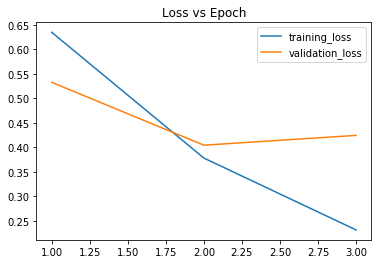

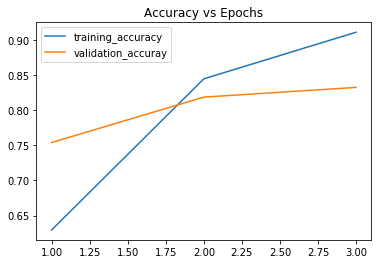

In [103]:
import matplotlib.pyplot as plt
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epoch = range(1,len(loss)+1)

plt.title("Loss vs Epoch")
plt.plot(epoch,loss,label = "training_loss")
plt.plot(epoch,val_loss,label = "validation_loss")

plt.legend()
plt.show()

plt.title("Accuracy vs Epochs")
plt.plot(epoch,acc,label = "training_accuracy")
plt.plot(epoch,val_acc,label = "validation_accuray")
plt.legend()
plt.show()

In [ ]:
model.save("model_RNN.h5")

In [88]:
!ls

Untitled.ipynb best_model_RNN model_RNN.h5


In [104]:
model.load_weights("best_model_RNN")

In [105]:
model.evaluate(X_test,Y_t)

25000/25000 [==============================] - 18s 703us/step


[0.4120775371551514, 0.8194800019264221]

In [113]:
model.predict(X_test[0])

array([[0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.43967146],
       [0.439